In [1]:
import trainer
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
splited_dataset = trainer.prepare_data('project-1-at-2024-10-07-14-12-077a1aee.json')    

  0%|          | 0/105 [00:00<?, ?it/s]

fbf62549-audio.wav
<class 'IndexError'> trainer.py 74
list index out of range


  7%|▋         | 7/105 [00:11<01:45,  1.08s/it]

1a2f5d5f-Bexter__alaris_on.m4a
<class 'IndexError'> trainer.py 74
list index out of range


 91%|█████████▏| 96/105 [00:19<00:01,  7.89it/s]

3f84618c-spacelab3.m4a
<class 'IndexError'> trainer.py 74
list index out of range


100%|██████████| 105/105 [00:20<00:00,  5.04it/s]


In [3]:
mfcc_features = trainer.get_mfcc(splited_dataset)
print(len(mfcc_features['Hospital Devices']))
mfcc_features = {label: features*2 for label, features in mfcc_features.items()}
print(len(mfcc_features['Hospital Devices']))


13
26


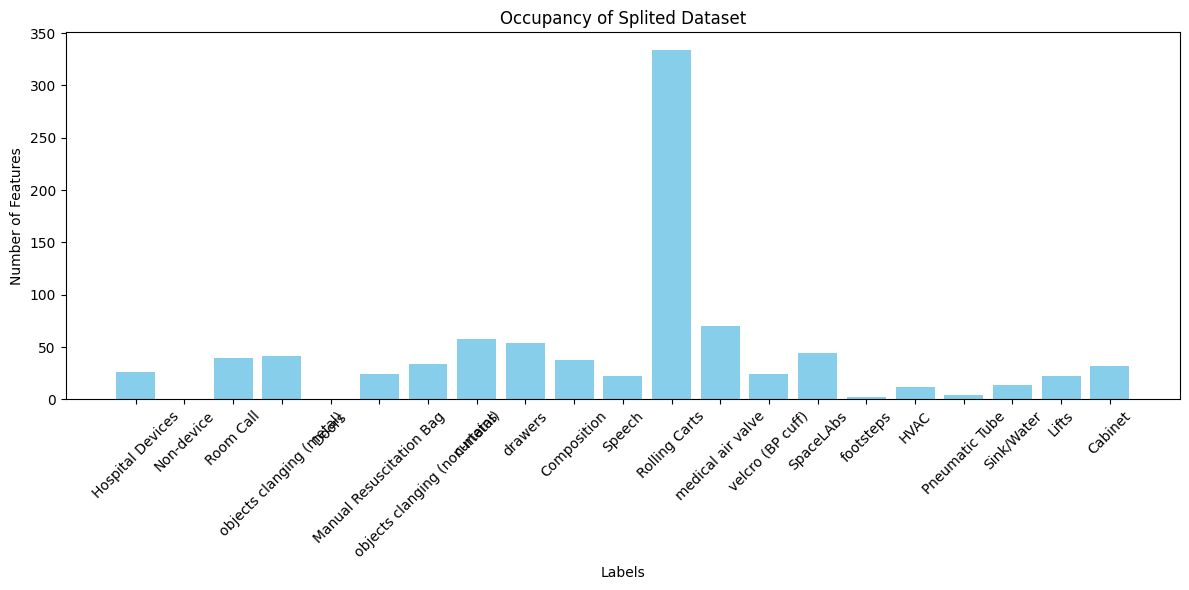

In [4]:
# Visualize the occupancy of the splited dataset
occupancy = {label: len(features) for label, features in mfcc_features.items()}
labels = list(occupancy.keys())
values = list(occupancy.values())

plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Number of Features')
plt.title('Occupancy of Splited Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:

x_train, x_test, y_train, y_test, label = trainer.split_data(mfcc_features)

Training set size: 627
Testing set size: 269


In [6]:

model = trainer.build_model(x_train, x_test, y_train, y_test)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 40, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 20, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10, 128)        │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       328,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 19)             │         9,747 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 383,571 (1.46 MB)

 Trainable params: 383,571 (1.46 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2874 - loss: 6.2926 - val_accuracy: 0.6208 - val_loss: 1.8354
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5493 - loss: 1.7107 - val_accuracy: 0.6506 - val_loss: 1.2222
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6697 - loss: 1.1347 - val_accuracy: 0.7435 - val_loss: 0.7798
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7054 - loss: 0.9124 - val_accuracy: 0.8253 - val_loss: 0.6809
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8099 - loss: 0.6042 - val_accuracy: 0.8476 - val_loss: 0.5218
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8135 - loss: 0.5781 - val_accuracy: 0.8773 - val_loss: 0.3941
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8759 - loss: 0.4239 - val_accuracy: 0.8625 - val_loss: 0.4444
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8753 - loss: 0.3937 - val_accuracy: 0.9145 - v

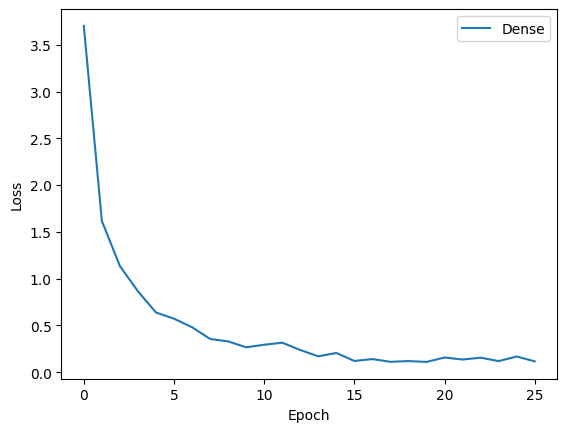

In [7]:

trainer.train(model, x_train, x_test, y_train, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9631 - loss: 0.0753
Test Loss: 0.0856
Test Accuracy: 0.9517
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
                              precision    recall  f1-score   support

            Hospital Devices       1.00      1.00      1.00         6
                   Room Call       1.00      1.00      1.00        12
    objects clanging (metal)       1.00      1.00      1.00        15
    Manual Resuscitation Bag       1.00      1.00      1.00         4
objects clanging (non-metal)       1.00      1.00      1.00         9
                    curtains       1.00      1.00      1.00        15
                     drawers       1.00      0.85      0.92        13
                 Composition       1.00      0.88      0.94        17
                      Speech       1.00      0.75      0.86         8
               Rolling Carts       0.96      1.00      0.98       109
           medical air valve       0.71      1.00      0.83        17
          

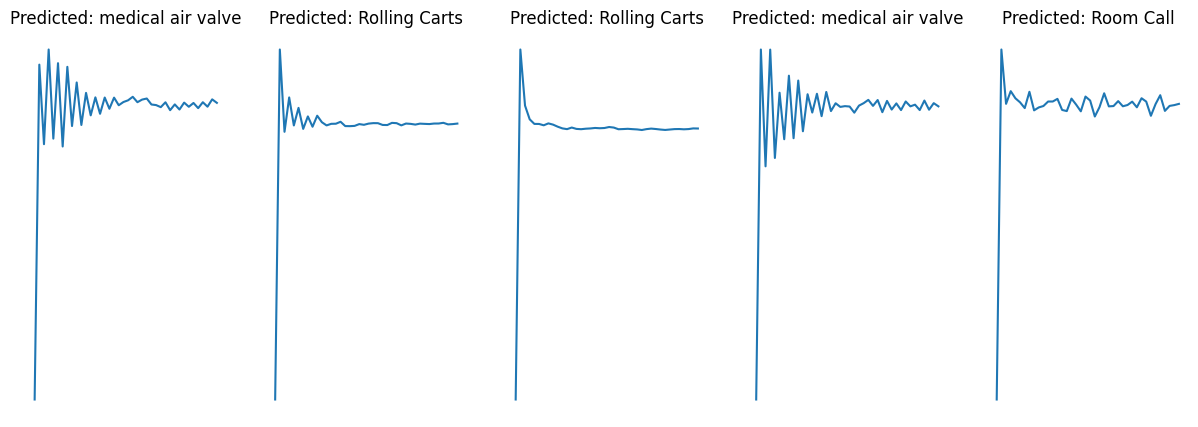

In [8]:
trainer.evaluate(model, x_test, y_test, label)

In [9]:
import tensorflow as tf
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to a .tflite file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\Hoon\AppData\Local\Temp\tmpjqrky3xa\assets


INFO:tensorflow:Assets written to: C:\Users\Hoon\AppData\Local\Temp\tmpjqrky3xa\assets


Saved artifact at 'C:\Users\Hoon\AppData\Local\Temp\tmpjqrky3xa'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 40, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 19), dtype=tf.float32, name=None)
Captures:
  1293858364000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1293858368928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1296207994672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1296207994320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1296208001888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1296208368336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1296208372736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1296208373616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1296208550672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1296208551552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12962085545

In [40]:
import tensorflow as tf

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='model.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Prepare the input data
input_shape = input_details[0]['shape']
x_test_input = np.array([x.reshape(input_shape) for x in x_test])  # Reshape x_test to match the input shape

# Run the model
interpreter.set_tensor(input_details[0]['index'], x_test_input[0])
interpreter.invoke()

# Get the output
output_data = interpreter.get_tensor(output_details[0]['index'])

# Convert predictions from probabilities to class labels
predicted_classes = tf.argmax(output_data, axis=1).numpy()
true_classes = tf.argmax(y_test, axis=1).numpy()

# Generate a classification report
from sklearn.metrics import classification_report
report = classification_report(true_classes.reshape(len(true_classes),1), predicted_classes, target_names=[label[i] for i in np.unique(true_classes)])
print(report)


ValueError: cannot reshape array of size 1 into shape (269,1)

In [43]:
model.save('model.h5')


In [44]:
from keras.models import load_model

# Load the model
model = load_model('model.h5')

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Generate a classification report
from sklearn.metrics import classification_report
report = classification_report(true_classes, predicted_classes, target_names=[label[i] for i in np.unique(true_classes)])
print(report)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9631 - loss: 0.0753  
Test Loss: 0.08555255085229874, Test Accuracy: 0.9516728520393372
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
                              precision    recall  f1-score   support

            Hospital Devices       1.00      1.00      1.00         6
                   Room Call       1.00      1.00      1.00        12
    objects clanging (metal)       1.00      1.00      1.00        15
    Manual Resuscitation Bag       1.00      1.00      1.00         4
objects clanging (non-metal)       1.00      1.00      1.00         9
                    curtains       1.00      1.00      1.00        15
                     drawers       1.00      0.85      0.92        13
                 Composition       1.00      0.88      0.94        17
                      Speech       1.00      0.75      0.86         8
               Rolling Carts       0.96      1.00      0.98       109
           medical air valve       0.71      1.00   